In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

from arithmetic import *

In [2]:
n = 5
iters = 4

#

coin_qr = QuantumRegister(1)
pos_qr = QuantumRegister(n)
pos_cr = ClassicalRegister(n)
carry_qr = QuantumRegister(n - 1)
cond_qr = QuantumRegister(1)
ancilla_qr = QuantumRegister(1) # As many as control qubits

circuit = QuantumCircuit(coin_qr, pos_qr, carry_qr, cond_qr, ancilla_qr, pos_cr)
#circuit.x(coin_qr[0])
for i in range(iters):
    circuit.h(coin_qr[0])
    mc_add_classical(circuit, [ coin_qr[0] ], 1, pos_qr, carry_qr, cond_qr, ancilla_qr)
    circuit.x(coin_qr[0])
    mc_subtract_classical(circuit, [ coin_qr[0] ], 1, pos_qr, carry_qr, cond_qr, ancilla_qr)
    circuit.x(coin_qr[0])
circuit.measure(pos_qr, pos_cr)

In [72]:
circuit.depth()

312

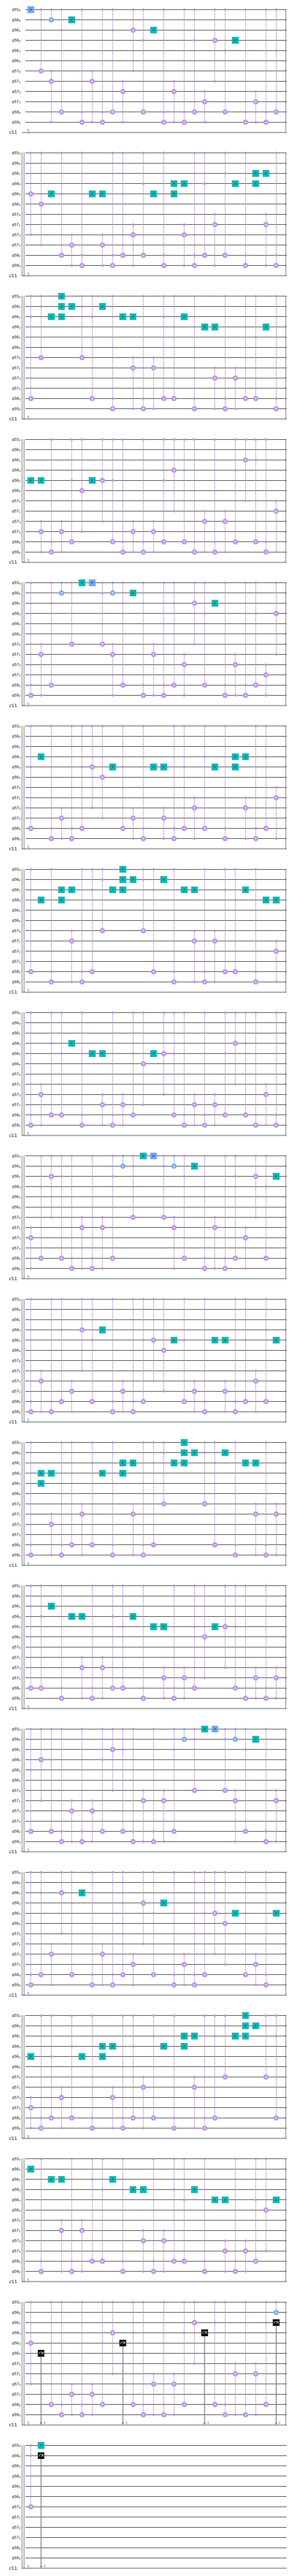

In [73]:
circuit.draw(output="mpl")

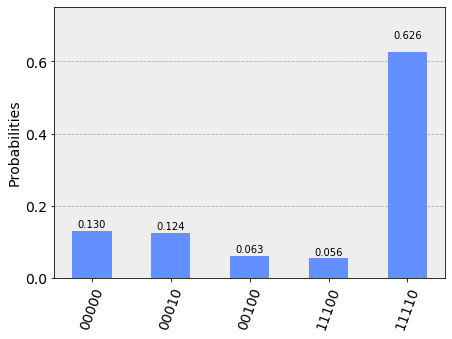

In [74]:
job = execute(circuit, backend=BasicAer.get_backend("qasm_simulator"), shots=10000)
result = job.result()
plot_histogram(result.get_counts(circuit))

In [75]:
counts = result.get_counts()
x_values = [ -2 ** (n - 1) * int(x / (2 ** (n - 1))) + x % (2 ** (n - 1)) for x in range(2 ** n) ]
x_strings = [ ("{0:0" + str(n) + "b}").format(x) for x in range(2 ** n)  ]
y_values = [ counts[x_strings[x]] if x_strings[x] in counts else 0 for x in range(2 ** n) ]

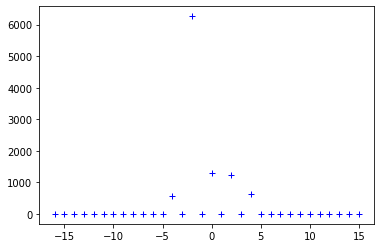

In [76]:
plt.plot(x_values, y_values, "b+")